<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-файлов" data-toc-modified-id="Изучение-файлов-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение файлов</a></span></li><li><span><a href="#Проверка-на-правильность-вычислений" data-toc-modified-id="Проверка-на-правильность-вычислений-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка на правильность вычислений</a></span></li><li><span><a href="#Анализ-признаков,-недоступных-в-тестовой-выборке" data-toc-modified-id="Анализ-признаков,-недоступных-в-тестовой-выборке-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков, недоступных в тестовой выборке</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов-(Au,-Ag,-Pb)" data-toc-modified-id="Изменение-концентрации-металлов-(Au,-Ag,-Pb)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов (Au, Ag, Pb)</a></span></li><li><span><a href="#Сравнение-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках" data-toc-modified-id="Сравнение-распределений-размеров-гранул-сырья-на-обучающей-и-тестовой-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-черновом-и-финальных-концентратах" data-toc-modified-id="Исследование-суммарной-концентрации-всех-веществ-на-разных-стадиях:-в-сырье,-черновом-и-финальных-концентратах-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, черновом и финальных концентратах</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Функция-для-вычисления-итоговой-sMAPE" data-toc-modified-id="Функция-для-вычисления-итоговой-sMAPE-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Функция для вычисления итоговой sMAPE</a></span></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обучение моделей</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

<div class="alert alert-block alert-info">
<b>Цель проекта:</b> необходимо предсказать коэффициент восстановления золота из золотосодержащей руды.

<b>Входные данные:</b> данные с параметрами добычи и очистки.

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from random import randint
random_state = 12345
import warnings
warnings.filterwarnings('ignore')
import os

## Подготовка данных

### Изучение файлов

In [2]:
pth = '/datasets'
try:
    data_train = pd.read_csv(pth + "/gold_recovery_train_new.csv")
    data_test = pd.read_csv(pth + "/gold_recovery_test_new.csv")
    data_full = pd.read_csv(pth + "/gold_recovery_full_new.csv")

except:
    print('Something is wrong')

In [3]:
print(data_train.info())
print(data_test.info())
print(data_full.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [4]:
display(data_train.head())
display(data_test.head())
display(data_full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


### Проверка на правильность вычислений

In [5]:
#Выделим все поля, которые начинаются на rough
names_rougher = []
pattern = r"rougher.*"
for name in data_train.columns:
    match_obj = re.findall(pattern, name)
    if len(match_obj) > 0:
        names_rougher.append(match_obj)
names_rougher = [a for b in names_rougher for a in b]
print(names_rougher)

['rougher.calculation.sulfate_to_au_concentrate', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.au_pb_ratio', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_rate', 'rougher.input.feed_size', 'rougher.input.feed_sol', 'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate', 'rougher.input.floatbank10_xanthate', 'rougher.input.floatbank11_sulfate', 'rougher.input.floatbank11_xanthate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au', 'rougher.output.recovery', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_sol', 'rougher.output.tail_au', 'rougher.state.floatbank10_a_air', 'rougher.state.floatbank10_a_level', 'rougher.state.floatbank10_b_air', 'rougher.state.floatbank10_b_level', 'rougher.state.floatbank10_c_air', 'rougher.state.floatbank10_c_level', 'rougher.state.floatb

In [6]:
#создадим функцию для расчета recovery
def calculate_recovery(row):
    value = (row['rougher.output.concentrate_au'] * (row['rougher.input.feed_au'] - row['rougher.output.tail_au'])) / (row['rougher.input.feed_au'] * (row['rougher.output.concentrate_au'] - row['rougher.output.tail_au'])) * 100
    return value  

In [7]:
#Запишем в отдельный столбец рассчитанную эффективность
data_train['rougher.calculated.recovery'] = data_train.apply(calculate_recovery, axis=1)

In [8]:
rough_mae = mean_absolute_error(data_train['rougher.output.recovery'] ,data_train['rougher.calculated.recovery'])
print(f"MAE между расчетами и значением признака rougher.output.recovery={rough_mae} %")

MAE между расчетами и значением признака rougher.output.recovery=9.73512347450521e-15 %


In [9]:
#Выведем все поля, где разница между исходной и рассчитанной эффективностью не равна 0
data_train['difference'] = (data_train['rougher.output.recovery'] - data_train['rougher.calculated.recovery']).astype("float")
data_train[data_train['difference'] != 0]

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.calculated.recovery,difference
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184,86.843261,-1.421085e-14
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363,86.842308,-1.421085e-14
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915,88.156912,-1.421085e-14
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470,88.168065,1.421085e-14
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188,87.035862,-1.421085e-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14138,2018-08-18 00:59:59,3.525247,12.121578,6.605982,45.785582,75.185602,9.041052,3.208360,9.792629,1.534906,...,19.984883,-501.051735,17.948892,-500.147451,13.009772,-500.081309,20.012084,-501.651764,91.675070,1.421085e-14
14140,2018-08-18 02:59:59,3.187398,11.423128,6.790500,46.801679,68.369674,9.043962,3.629573,10.037518,1.838214,...,20.044418,-500.415095,18.026001,-499.866058,13.001740,-499.914235,20.005963,-500.767097,89.946627,-1.421085e-14
14143,2018-08-18 05:59:59,3.192996,11.612338,6.824441,46.710119,74.817644,8.665858,2.938592,10.241498,1.393077,...,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155,91.816623,1.421085e-14
14146,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452,88.890579,1.421085e-14


<div class="alert alert-block alert-info">
Значение MAE очень маленькое, что говорит о том, что есть очень маленькие погрешности в изначальном расчете. Небольшие отклонения присутствуют по 7437 объектам.

### Анализ признаков, недоступных в тестовой выборке

In [10]:
#Удалим расчетный столбец из предыдущего пункта
data_train = data_train.drop('difference', axis=1)

In [11]:
print("Список признаков, которые есть в обучающей, но нет в тестовой выборке:") 
set(data_train.columns) - set(data_test.columns)

Список признаков, которые есть в обучающей, но нет в тестовой выборке:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculated.recovery',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.outp

<div class="alert alert-block alert-info">
В тестовой выборке нет:
    
- целевых признаков (rougher.output.recovery, final.output.recovery), 
- расчетных характеристик после флотации (rougher.calculation...)
- параметров продукта после флотации (rougher.output.concentrate_au)
- параметров отвальных хвостов после флотации (rougher.output.tail_au)
- параметров продукта после первичной очистки (primary_cleaner.output.concentrate_au)
- параметров отвальных хвостов после первичной очистки (primary_cleaner.output.tail_au)
- параметров отвальных хвостов после вторичной очистки (secondary_cleaner.output.tail_au)
- финальных характеристик концентрата (final.output.concentrate_au)
- финальных характеристик отвальных хвостов (final.output.tail_au)
- рассчитанного в предыдущем в пункте значения recovery (rougher.calculated_recovery)

    
    
То есть в тестовом наборе отсутствуют признаки, которые отражают результаты технологического процесса.    


### Предобработка данных

In [12]:
#Для начала посмотрим на признаки в обучающей и тестовой выборках. Удалим из обучающей выборки те признаки, которых нет в тестовлй выборке
missing_features = list(set(data_train) - set(data_test))
print("Признаки, которых нет в обучающей выборке:", sorted(missing_features))
missing_features.remove('rougher.output.recovery')
missing_features.remove('final.output.recovery')
data_train = data_train.drop(missing_features, axis=1)

Признаки, которых нет в обучающей выборке: ['final.output.concentrate_ag', 'final.output.concentrate_au', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_au', 'final.output.tail_pb', 'final.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_sol', 'rougher.calculated.recovery', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.recovery', 'rougher.output.tail_ag'

In [13]:
#Сразу в тестовую выборку добавим целевые признаки из data_full
data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on='date')

In [14]:
#Проверим
print(len(data_train.columns))
print(len(data_test.columns))

55
55


In [15]:
#Проверим данные на пропуски
print(data_train.isna().sum())
print(data_test.isna().sum())

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


In [16]:
#Заполним пропуски ближайшими по времени значениями
data_train = data_train.fillna(method="bfill")
data_test = data_test.fillna(method="bfill")

In [17]:
#Проверка на явные дубликаты
print(data_train.duplicated().sum())
print(data_test.duplicated().sum())

0
0


<AxesSubplot:>

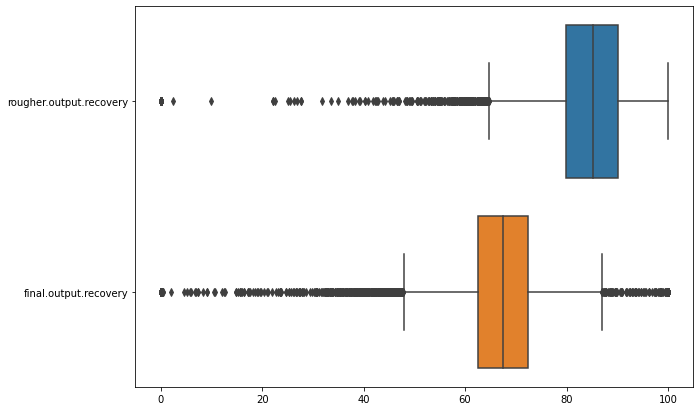

In [18]:
#Проверим данные на аномалии
#Посмотрим на диаграммы размаха целевых признаков
plt.figure(figsize=(10,7))
sns.boxplot(data=data_train[['rougher.output.recovery', 'final.output.recovery']], orient='h')

In [19]:
#создадим функцию для расчета межквартильного размаха и размахов "усов" слева и справа для признаков rougher.output.recovery, final.output.recovery
def IQR(data, feature1='rougher.output.recovery', feature2='final.output.recovery'):
    Q1_rougher = data[feature1].quantile(0.25)
    Q3_rougher = data[feature1].quantile(0.75)
    IQR_rougher = Q3_rougher - Q1_rougher
    left_mustache_rougher = Q1_rougher - 1.5 * IQR_rougher
    right_mustache_rougher = Q3_rougher + 1.5 * IQR_rougher
    
    Q1_final = data[feature2].quantile(0.25)
    Q3_final = data[feature2].quantile(0.75)
    IQR_final = Q3_final - Q1_final
    left_mustache_final = Q1_final - 1.5 * IQR_final
    right_mustache_final = Q3_final + 1.5 * IQR_final
    
    return left_mustache_rougher, right_mustache_rougher, left_mustache_final, right_mustache_final

In [20]:
#Получим значения левого и правого усов для обоих целевых признаков
left_mustache_rougher, right_mustache_rougher, left_mustache_final, right_mustache_final = IQR(data_train)

print("Количество аномальных объектов чернового концентрата, находящееся за пределами левого уса:", len(data_train[data_train['rougher.output.recovery'] < left_mustache_rougher]))
print("Количество аномальных объектовчернового концентрата, находящееся за пределами правого уса:", len(data_train[data_train['rougher.output.recovery'] > right_mustache_rougher]))

print("Количество аномальных объектов финального концентрата, находящееся за пределами левого уса:", len(data_train[data_train['final.output.recovery'] < left_mustache_final]))
print("Количество аномальных объектов финального концентрата, находящееся за пределами правого уса:", len(data_train[data_train['final.output.recovery'] > right_mustache_final]))

Количество аномальных объектов чернового концентрата, находящееся за пределами левого уса: 574
Количество аномальных объектовчернового концентрата, находящееся за пределами правого уса: 0
Количество аномальных объектов финального концентрата, находящееся за пределами левого уса: 552
Количество аномальных объектов финального концентрата, находящееся за пределами правого уса: 160


<div class="alert alert-block alert-info">
Видно, что присутствуют значения, находящиеся за пределами усов, что говорит о том, что это могут быть выбросы. Однако левосторонних аномальных значений достаточно много, нежелательно столько много удалять. Посмотрим, сколько объектов с нулевой эффективностью обогащения чернового концентрата и финального концентрата.

In [21]:
print("Количество объектов обучающей выборки с нулевой эффективностью обогащения чернового концентрата:", len(data_train[data_train['rougher.output.recovery'] == 0]))
print("Количество объектов обучающей выборки с нулевой эффективностью обогащения финального концентрата:", len(data_train[data_train['final.output.recovery'] == 0]))

Количество объектов обучающей выборки с нулевой эффективностью обогащения чернового концентрата: 297
Количество объектов обучающей выборки с нулевой эффективностью обогащения финального концентрата: 58


<div class="alert alert-block alert-info">
Нулевая эффективность обогащения чернового и финального концентрата может говорить (в соответствие с формулой) о том, что в концентрате после флотации/очистки нулевая доля золота или о том, что доля золота в сырье/концентрате до флотации/очистки равна доле золота в отвальных хвостах после флотации/очистки.
Такие объекты лучше исключить из выборки, поскольку они не эффективны с точки зрения обогащения чернового концентрата. 

In [22]:
data_train = data_train[(data_train['final.output.recovery'] != 0) & (data_train['rougher.output.recovery'] != 0)]

<AxesSubplot:>

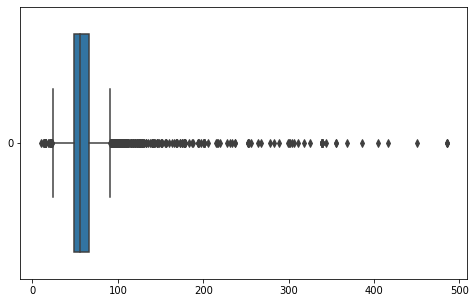

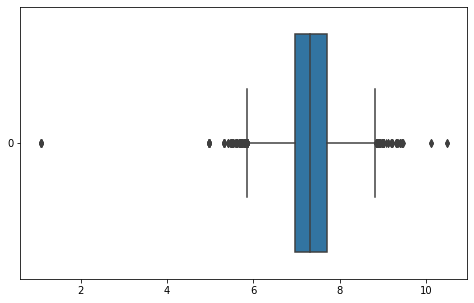

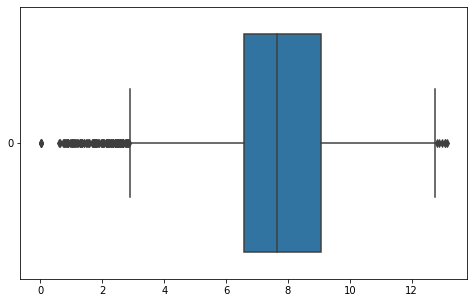

In [23]:
#Посмотрим также на диаграмы рассеивания по признакам rougher.input.feed_size, primary_cleaner.input.feed_size, rougher.input.feed_au
plt.figure(figsize=(8,5))
sns.boxplot(data=data_train['rougher.input.feed_size'], orient='h')
plt.figure(figsize=(8,5))
sns.boxplot(data=data_train['primary_cleaner.input.feed_size'], orient='h')
plt.figure(figsize=(8,5))
sns.boxplot(data=data_train['rougher.input.feed_au'], orient='h')

<div class="alert alert-block alert-info">
Удалим слишком выделяющиеся объекты по признаку rougher.input.feed_size (больше 400), за пределами усов значений много-удалять их не стоит.
По признаку primary_cleaner.input.feed_size удалим объекты с значениями меньше 2 и больше 10 - это явно аномалии.
По признак rougher.input.feed_au удалим объекты со значением, меньше 1    

In [24]:
data_train = data_train[(data_train['rougher.input.feed_size'] < 200) & (data_train['primary_cleaner.input.feed_size'] > 2 ) & (data_train['primary_cleaner.input.feed_size'] < 10) & (data_train['rougher.input.feed_au'] > 1)]

<AxesSubplot:>

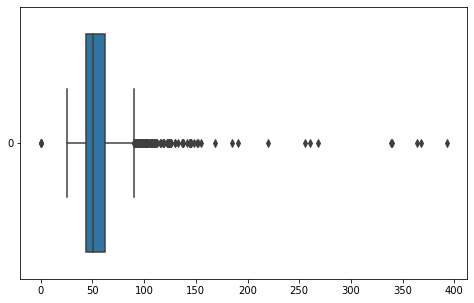

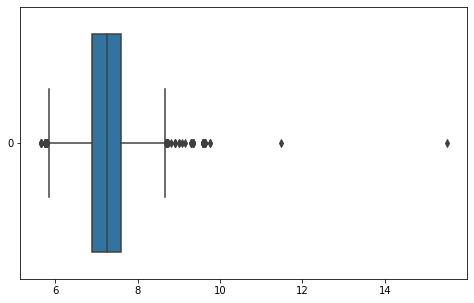

In [25]:
#Посмотрим на диаграмы рассеивания data_test по признакам rougher.input.feed_size, primary_cleaner.input.feed_size
plt.figure(figsize=(8,5))
sns.boxplot(data=data_test['rougher.input.feed_size'], orient='h')
plt.figure(figsize=(8,5))
sns.boxplot(data=data_test['primary_cleaner.input.feed_size'], orient='h')

<div class="alert alert-block alert-info">
Удалим слишком выделяющиеся объекты по признаку rougher.input.feed_size (больше 150 и меньше 20), за пределами усов значений много-удалять их не стоит.
По признаку primary_cleaner.input.feed_size удалим объекты с значениями больше 10 - это явно аномалии.

In [26]:
data_test = data_test[(data_test['rougher.input.feed_size'] < 150) & (data_test['rougher.input.feed_size'] > 20) & (data_test['primary_cleaner.input.feed_size'] < 10)]

In [27]:
#Посмотрим на зависимость признаков между собой, напишем функцию для расчета корреляции между признаками
def correlation(data):
    column_list_pair = []
    column_list = []
    for i in data.columns:
        for j in data.columns:
            coeff_cor = data[i].corr(data[j])
            if i != j and {i,j} not in column_list_pair:
                if coeff_cor > 0.7:
                    column_list_pair.append({i,j})
                    column_list.append(i)
    return column_list_pair, column_list

In [28]:
#сохраним в переменную пару признаков и коэффициент корреляции между ними
correlation_list_pair, correlation_list = correlation(data_train.loc[:, 'final.output.recovery':'secondary_cleaner.state.floatbank6_a_level'])

In [29]:
print("Количество пар признаков с высокой корреляцией в data_train:", len(correlation_list_pair))

Количество пар признаков с высокой корреляцией в data_train: 47


<div class="alert alert-block alert-info">
Высокая зависимость наблюдается у 56 пар признаков обучающей выборки. Оставим только один признак из этой пары и сохраним в другой обучающий датафрейм

In [30]:
#Уберем признаки, по одному из пар признаков, сильно коррелирующих между собой
data_train_preprocessed = data_train[list(set(data_train.columns) - set(correlation_list))]

In [31]:
#Удалим эти же признаки из data_test
data_test_preprocessed = data_test[list(set(data_test.columns) - set(correlation_list))]

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb)

In [32]:
#Отберем признаки для исследования концентрации металов на разных этапах
change_columns = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.tail_ag',     'rougher.output.tail_pb', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_ag',  'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au','primary_cleaner.output.tail_ag','primary_cleaner.output.tail_pb','primary_cleaner.output.tail_au','final.output.concentrate_ag','final.output.concentrate_pb','final.output.concentrate_au','secondary_cleaner.output.tail_ag','secondary_cleaner.output.tail_pb','secondary_cleaner.output.tail_au', 'rougher.input.feed_ag', 'rougher.input.feed_au', 'rougher.input.feed_pb']

In [33]:
#Создадим копию общего датасета
data_full_copy = data_full.copy()
#Добавим строку со средним значением для каждого признака
data_full_copy.loc['mean_value'] = data_full.mean()

In [34]:
#запишем в таблицу средние значения концентрации металлов
metal_concentration = pd.DataFrame(data_full_copy.loc['mean_value', change_columns])
metal_concentration

,mean_value
rougher.output.concentrate_ag,11.994759
rougher.output.concentrate_pb,7.606272
rougher.output.concentrate_au,19.772
rougher.output.tail_ag,5.588982
rougher.output.tail_pb,0.645782
rougher.output.tail_au,1.816391
primary_cleaner.output.concentrate_ag,8.442408
primary_cleaner.output.concentrate_pb,9.82953
primary_cleaner.output.concentrate_au,32.1194
primary_cleaner.output.tail_ag,16.145826


In [35]:
#Создадим таблицу для отображения концентрации металлов в концентрате на различных этапах очистки
concentrate = pd.DataFrame({"Этап": ["Исходное сырьё", "Флотация", "Первый этап очистки", "Второй этап очистки"],
                           "Au": [metal_concentration.loc['rougher.input.feed_au', 'mean_value'], metal_concentration.loc['rougher.output.concentrate_au', 'mean_value'], metal_concentration.loc['primary_cleaner.output.concentrate_au', 'mean_value'], metal_concentration.loc['final.output.concentrate_au', 'mean_value']],
                           "Ag": [metal_concentration.loc['rougher.input.feed_ag', 'mean_value'], metal_concentration.loc['rougher.output.concentrate_ag', 'mean_value'], metal_concentration.loc['primary_cleaner.output.concentrate_ag', 'mean_value'], metal_concentration.loc['final.output.concentrate_ag', 'mean_value']],
                           "Pb": [metal_concentration.loc['rougher.input.feed_pb', 'mean_value'], metal_concentration.loc['rougher.output.concentrate_pb', 'mean_value'], metal_concentration.loc['primary_cleaner.output.concentrate_pb', 'mean_value'], metal_concentration.loc['final.output.concentrate_pb', 'mean_value']]
                           }) 
concentrate

,Этап,Au,Ag,Pb
0,Исходное сырьё,8.266097,8.794927,3.598085
1,Флотация,19.772000,11.994759,7.606272
2,Первый этап очистки,32.119400,8.442408,9.829530
3,Второй этап очистки,44.076513,5.168470,9.978895


<AxesSubplot:title={'center':'Изменение концентрации металлов в концентрате'}, xlabel='Этапы очистки', ylabel='Концентрация металлов'>

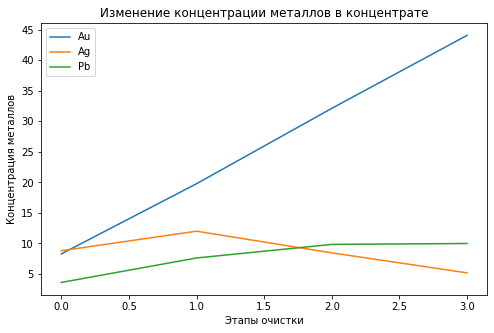

In [36]:
concentrate.plot(figsize=(8,5), xlabel="Этапы очистки", ylabel="Концентрация металлов", title="Изменение концентрации металлов в концентрате")

In [37]:
#Создадим таблицу для отображения концентрации металлов в отвальных хвостах на различных этапах очистки
tail = pd.DataFrame({"Этап": ["Исходное сырье", "Флотация", "Первый этап очистки", "Второй этап очистки"],
                           "Au": [metal_concentration.loc['rougher.input.feed_au', 'mean_value'], metal_concentration.loc['rougher.output.tail_au', 'mean_value'], metal_concentration.loc['primary_cleaner.output.tail_au', 'mean_value'], metal_concentration.loc['secondary_cleaner.output.tail_au', 'mean_value']],
                           "Ag": [metal_concentration.loc['rougher.input.feed_ag', 'mean_value'], metal_concentration.loc['rougher.output.tail_ag', 'mean_value'], metal_concentration.loc['primary_cleaner.output.tail_ag', 'mean_value'], metal_concentration.loc['secondary_cleaner.output.tail_ag', 'mean_value']],
                           "Pb": [metal_concentration.loc['rougher.input.feed_pb', 'mean_value'], metal_concentration.loc['rougher.output.tail_pb', 'mean_value'], metal_concentration.loc['primary_cleaner.output.tail_pb', 'mean_value'], metal_concentration.loc['secondary_cleaner.output.tail_pb', 'mean_value']]
                           }) 
tail

,Этап,Au,Ag,Pb
0,Исходное сырье,8.266097,8.794927,3.598085
1,Флотация,1.816391,5.588982,0.645782
2,Первый этап очистки,3.914179,16.145826,3.435656
3,Второй этап очистки,4.339625,14.586833,5.777703


<AxesSubplot:title={'center':'Изменение концентрации металлов в отвальных хвостах'}, xlabel='Этапы очистки', ylabel='Концентрация металлов'>

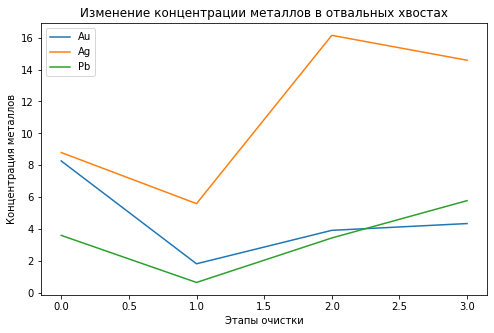

In [38]:
tail.plot(figsize=(8,5), xlabel="Этапы очистки", ylabel="Концентрация металлов", title="Изменение концентрации металлов в отвальных хвостах")

<div class="alert alert-block alert-info">
Концентрация золота в концентрате увеличивается с каждым этапом очистки, концентрация серебра снчала увеличивается, потом снижается, свинца-немного увеличивается.
    

    
В отвальных хвостах, после флотации концентрация всех металлов уменьшается, дальше с каждым этапом концентрация свинца увеличивается, серебра - сначала резко увеличивается, потом снижается, концентрация золота увеличивается незначительно и находится на низком уровне.
</div>    

### Сравнение распределений размеров гранул сырья на обучающей и тестовой выборках

In [39]:
#Выделим поля с значениями гранул сырья на обучающей и тестовой выборках
names_feedsize_train = []
names_feedsize_test = []
pattern = r".*feed_size"
for name in data_train.columns:
    match_obj = re.findall(pattern, name)
    if len(match_obj) > 0:
        names_feedsize_train.append(match_obj)
for name in data_test.columns:
    match_obj = re.findall(pattern, name)
    if len(match_obj) > 0:
        names_feedsize_test.append(match_obj)
names_feedsize_train = [a for b in names_feedsize_train for a in b]
names_feedsize_test = [a for b in names_feedsize_test for a in b]
print(names_feedsize_train)
print(names_feedsize_test)

['primary_cleaner.input.feed_size', 'rougher.input.feed_size']
['primary_cleaner.input.feed_size', 'rougher.input.feed_size']


<AxesSubplot:title={'center':'Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации'}, ylabel='Frequency'>

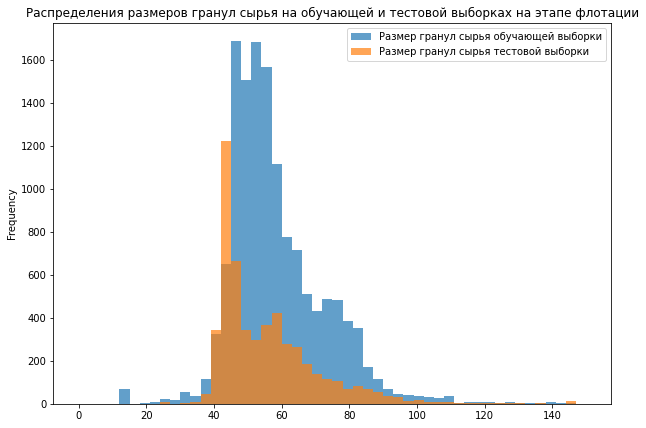

In [40]:
#Построим графики распеределений размеров гранул сырья на обучающей и тестовой выборках на этапе флотации
ax = data_train.plot(
    kind='hist', 
    y='rougher.input.feed_size', 
    bins=50, 
    range=(0,150), 
    figsize=(10,7), 
    alpha=0.7, 
    label="Размер гранул сырья обучающей выборки", 
    title="Распределения размеров гранул сырья на обучающей и тестовой выборках на этапе флотации",
)
data_test.plot(
    kind="hist",
    y='rougher.input.feed_size',
    bins=50,
    range=(0,150),
    ax=ax,
    label='Размер гранул сырья тестовой выборки',
    alpha=0.7
)

<AxesSubplot:title={'center':'Распределение размера гранул сырья на обучающей и тестовой выборках на этапе первичной очистки'}, ylabel='Frequency'>

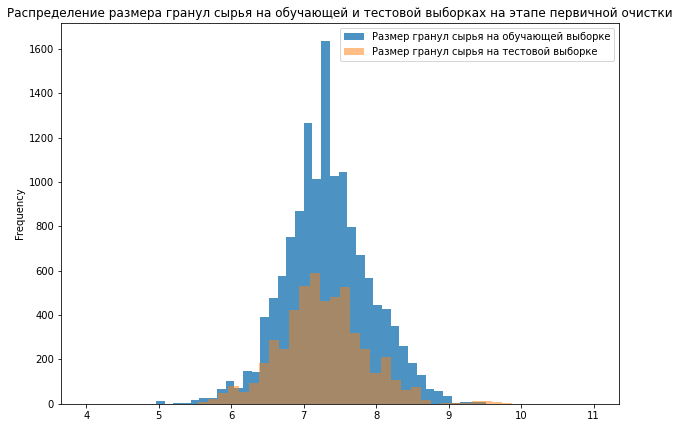

In [41]:
#Построим графики распеределений размеров гранул сырья на обучающей и тестовой выборках на этапе первичной очистки
ax = data_train.plot(
    kind="hist",
    y='primary_cleaner.input.feed_size',
    title="Распределение размера гранул сырья на обучающей и тестовой выборках на этапе первичной очистки",
    bins=50,
    range=(4,10),
    figsize=(10,7),
    label="Размер гранул сырья на обучающей выборке",
    legend=True,
    alpha=0.8,
)
data_test.plot(
    kind="hist",
    y='primary_cleaner.input.feed_size', 
    ax=ax,
    alpha=0.5,
    bins=50,
    range=(4,11),
    label='Размер гранул сырья на тестовой выборке'
)

<div class="alert alert-block alert-info">
    Распределения гранул сырья обучающей и тестовой выборок на этапе флотации и на этапе первичной очистки примерно похожи.
    Распределние на этапе флотации похоже на распределение Пуассона и скошено вправо, на этапе первичной очистки близко к нормальному.

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, черновом и финальных концентратах

In [42]:
#Выделим сначала признаки с концентрацией веществ в сырье
names_rougher_input = []
pattern = r'rougher.input.feed.*'
for name in data_full.columns:
    match_obj = re.findall(pattern, name)
    if len(match_obj) > 0:
        names_rougher_input.append(match_obj)
names_rougher_input = [a for b in names_rougher_input for a in b]
names_rougher_input = [name for name in names_rougher_input if (name != 'rougher.input.feed_rate') & (name != 'rougher.input.feed_size')]
print(names_rougher_input)        

['rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_au']


In [43]:
#Выделим признаки с концентрацией веществ в черновом концентрате и финальном концентрате
names_rougher_output = ['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'rougher.output.concentrate_au']
names_final_output = ['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_sol', 'final.output.concentrate_au']

In [44]:
#объединим все необходимые поля
names_concentration = names_rougher_input + names_rougher_output + names_final_output

In [45]:
data_full_copy.loc['sum_value'] = data_full.sum()

In [46]:
concentration = pd.DataFrame(data_full_copy.loc['sum_value', names_concentration])
concentration

,sum_value
rougher.input.feed_ag,170964.59423
rougher.input.feed_pb,69583.365339
rougher.input.feed_sol,709683.511837
rougher.input.feed_au,160684.665932
rougher.output.concentrate_ag,233166.127197
rougher.output.concentrate_pb,147858.327496
rougher.output.concentrate_sol,559288.961404
rougher.output.concentrate_au,384347.910711
final.output.concentrate_ag,100464.727124
final.output.concentrate_pb,193969.759284


In [47]:
total_concentration = pd.DataFrame({"Стадия": ['Cырьё', 'Черновой концентрат', 'Финальный концентрат'],
                                   "Cуммарная концентрация веществ (Ag, Pb, Sol, Au)": [concentration.loc['rougher.input.feed_ag':'rougher.input.feed_au', 'sum_value'].sum(),
                                                                                        concentration.loc['rougher.output.concentrate_ag':'rougher.output.concentrate_au', 'sum_value'].sum(),
                                                                                        concentration.loc['final.output.concentrate_ag':'final.output.concentrate_au', 'sum_value'].sum()
                                                                                       ]
                                    })
total_concentration['Cуммарная концентрация веществ (Ag, Pb, Sol, Au)'] = total_concentration['Cуммарная концентрация веществ (Ag, Pb, Sol, Au)'].astype("int")
total_concentration

,Стадия,"Cуммарная концентрация веществ (Ag, Pb, Sol, Au)"
0,Cырьё,1110916
1,Черновой концентрат,1324661
2,Финальный концентрат,1333927


<div class="alert alert-block alert-info">

**Вопрос студента**

Можно ли сгруппировать таблицу concentration, по началу названия строк?
В данном случае суммировать все строки с названиями, начинающимися на rougher.input.feed, rougher.output.concentrate, final.output.concentrate.
Как это можно было бы реализовать?

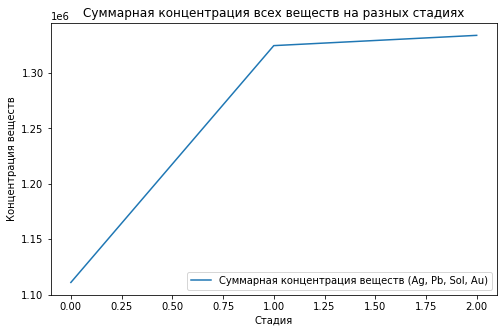

In [48]:
total_concentration.plot(
    title="Суммарная концентрация всех веществ на разных стадиях",
    xlabel="Стадия",
    ylabel='Концентрация веществ',
    figsize=(8,5)
)
plt.show()

<div class="alert alert-block alert-info">
    
Концентрация всех веществ в сырье гораздо ниже, чем в черновом и финальном концентратах. В черновом самая высокая концентрация, в финальном практически такая же.

In [49]:
concentration

,sum_value
rougher.input.feed_ag,170964.59423
rougher.input.feed_pb,69583.365339
rougher.input.feed_sol,709683.511837
rougher.input.feed_au,160684.665932
rougher.output.concentrate_ag,233166.127197
rougher.output.concentrate_pb,147858.327496
rougher.output.concentrate_sol,559288.961404
rougher.output.concentrate_au,384347.910711
final.output.concentrate_ag,100464.727124
final.output.concentrate_pb,193969.759284


In [50]:
df1 = concentration.loc[[i for i in concentration.index if 'rougher.input.feed_' in i ]]
df1.columns = ["rougher.input.feed"]
df1.index = ['ag', 'pb', 'sol', 'au']

In [51]:
df2 = concentration.loc[[i for i in concentration.index if 'rougher.output.concentrate_' in i ]]
df2.columns = ["rougher.output.concentrate"]
df2.index = ['ag', 'pb', 'sol', 'au']

In [52]:
df3 = concentration.loc[[i for i in concentration.index if 'final.output.concentrate_' in i ]]
df3.columns = ["final.output.concentrate"]
df3.index = ['ag', 'pb', 'sol', 'au']

In [53]:
df = df1.join([df2, df3])

In [54]:
df

,rougher.input.feed,rougher.output.concentrate,final.output.concentrate
ag,170964.59423,233166.127197,100464.727124
pb,69583.365339,147858.327496,193969.759284
sol,709683.511837,559288.961404,182689.538841
au,160684.665932,384347.910711,856803.335079


rougher.input.feed


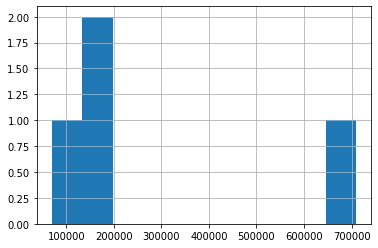

rougher.output.concentrate


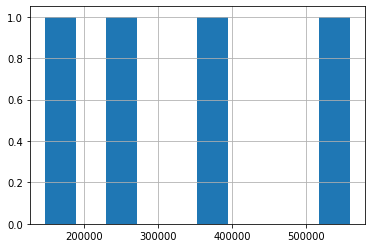

final.output.concentrate


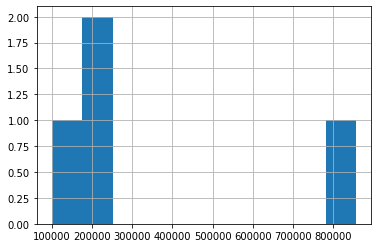

In [55]:
for name in df.columns:
    df[name].hist()
    print(name)
    plt.show()

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>

Исправила, но немного непонятно, правильно ли я сделала. Но можно сказать, что первая и третья гистограммы похожи, а вот вторая отличается. Каким образом по этим графиками почистить аномалии пока непонятно...  

In [56]:
stages = ['rougher.input.feed', 'rougher.output.concentrate', 'primary_cleaner.output.concentrate', 'final.output.concentrate']
def total_concentation_rougher_input_feed(row):
    value = row["rougher.input.feed_au"] + row["rougher.input.feed_ag"] + row["rougher.input.feed_pb"] + row["rougher.input.feed_sol"]
    return value
def total_concentation_rougher_output_concentrate(row):
    value = row["rougher.output.concentrate_au"] + row["rougher.output.concentrate_ag"] + row["rougher.output.concentrate_pb"] + row["rougher.output.concentrate_sol"]
    return value
def total_concentation_primary_cleaner_output_concentrate(row):
    value = row["primary_cleaner.output.concentrate_au"] + row["primary_cleaner.output.concentrate_ag"] + row["primary_cleaner.output.concentrate_pb"] + row["primary_cleaner.output.concentrate_sol"]
    return value
def total_concentation_final_output_concentrate(row):
    value = row["final.output.concentrate_au"] + row["final.output.concentrate_ag"] + row["final.output.concentrate_pb"] + row["final.output.concentrate_sol"]
    return value

In [57]:
for stage in stages:
    if stage == 'rougher.input.feed':
        data_full[stage + "_sum"] = data_full.apply(total_concentation_rougher_input_feed, axis=1)
    elif stage == 'rougher.output.concentrate':
        data_full[stage + "_sum"] = data_full.apply(total_concentation_rougher_output_concentrate, axis=1)
    elif stage == 'primary_cleaner.output.concentrate':
        data_full[stage + "_sum"] = data_full.apply(total_concentation_primary_cleaner_output_concentrate, axis=1)
    else:
        data_full[stage + "_sum"] = data_full.apply(total_concentation_final_output_concentrate, axis=1)

In [58]:
#Проверим на правильность расчетов
data_full[['rougher.input.feed_au', 'rougher.input.feed_ag', 'rougher.input.feed_pb', 'rougher.input.feed_sol', 'rougher.input.feed_sum']].head()

,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_sum
0,6.486150,6.100378,2.284912,36.808594,51.680034
1,6.478583,6.161113,2.266033,35.753385,50.659114
2,6.362222,6.116455,2.159622,35.971630,50.609929
3,6.118189,6.043309,2.037807,36.862241,51.061546
4,5.663707,6.060915,1.786875,34.347666,47.859163


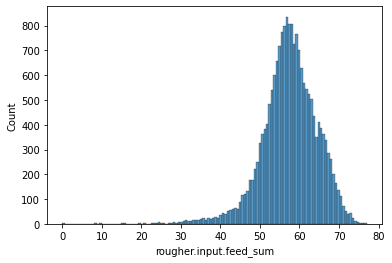

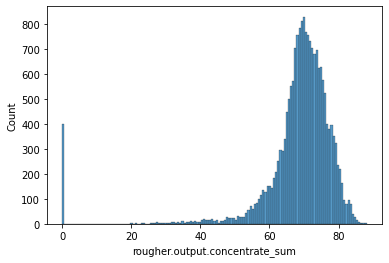

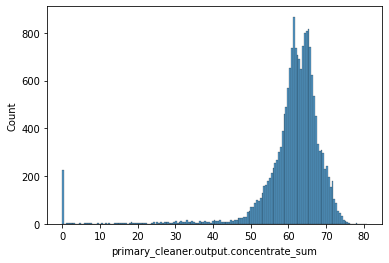

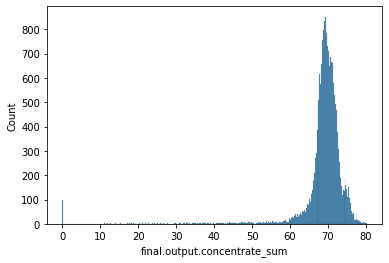

In [59]:
sum_features = ['rougher.input.feed_sum', 'rougher.output.concentrate_sum', 'primary_cleaner.output.concentrate_sum', 'final.output.concentrate_sum']
for name in sum_features:
    sns.histplot(data_full[name])
    plt.show()

In [60]:
#Удалим аномальные нулевые значения из data_full
for name in sum_features:
    data_full = data_full[data_full[name] > 0]

In [61]:
#Оставим в обучающей выборке только те объекты, которые есть в полной
data_train_preprocessed.shape

(13694, 31)

In [62]:
data_train_preprocessed = pd.merge(data_train_preprocessed, data_full['date'])

In [63]:
data_train_preprocessed.shape

(13060, 31)

<div class="alert alert-block alert-info">
<h2> Комментарий студента <a class="tocSkip"></h2>
    
    
Вроде как разобралась. Спасибо!)

## Модель

### Функция для вычисления итоговой sMAPE

In [64]:
def smape(target, predictions):
    smape = (((abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)).sum()) * 100) / len(target)
    return smape

In [65]:
def smape_total(target_rougher, predictions_rougher, target_final, predictions_final):
    final_smape = 0.25 * smape(target_rougher, predictions_rougher) + 0.75 * smape(target_final, predictions_final)
    return final_smape

### Обучение моделей

In [66]:
x_train = data_train_preprocessed.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1).reset_index(drop=True)
y_train1 = data_train_preprocessed['rougher.output.recovery'].reset_index(drop=True)
y_train2 = data_train_preprocessed['final.output.recovery'].reset_index(drop=True)

**Модель случайного леса с параметрами**

In [67]:
#Подберем параметры для RandomForestRegressor для первого цнелевого признака при помощи GridSearchCV
model = RandomForestRegressor()
parameters = {
    "max_depth": [randint(1,15)],
    "random_state": [random_state],
    "n_estimators": [randint(1,100)]
}
clf = GridSearchCV(model, parameters, error_score="raise", verbose=1, scoring=make_scorer(smape, greater_is_better=False))
clf.fit(x_train, y_train1)
print(clf.best_params_, -clf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'max_depth': 6, 'n_estimators': 40, 'random_state': 12345} 7.505786270437478


In [68]:
#Подберем параметры для RandomForestRegressor для второго целевого признака при помощи GridSearchCV
model = RandomForestRegressor()
parameters = {
    "max_depth": [randint(1,15)],
    "random_state": [random_state],
    "n_estimators": [randint(1,100)],
}
clf = GridSearchCV(model, parameters, verbose=1, error_score="raise", scoring=make_scorer(smape, greater_is_better=False))
clf.fit(x_train, y_train2)
print(clf.best_params_, -clf.best_score_)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
{'max_depth': 7, 'n_estimators': 47, 'random_state': 12345} 9.560684243191272


Для подсчета итогового smape реализуем метод kfold вручную, создадим функцию, которая возвращает обучающую и валидационную выборки:

In [69]:
def kfold(features, target):
    
    sample_size = int(len(features)/5)
    for i in range(0, len(features), sample_size):
        #запишим массив из индексов для обучающей выборки
        valid_indexes = [j for j in range(i, i + sample_size)]
        train_indexes = [l for l in range(0, i)] + [k for k in range(i + sample_size, len(features))]

        features_train = features.loc[train_indexes]
        target_train = target.loc[train_indexes]
    
        features_valid = features.loc[valid_indexes]
        target_valid = target.loc[valid_indexes]
        
    return features_train, features_valid, target_train, target_valid   

In [70]:
features_train1, features_valid1, target_train1, target_valid1 = kfold(x_train, y_train1)
features_train2, features_valid2, target_train2, target_valid2 = kfold(x_train, y_train2)

In [71]:
model = RandomForestRegressor(max_depth=6, n_estimators=97, random_state=random_state)
model.fit(features_train1, target_train1)
pred1 = model.predict(features_valid1)

In [72]:
model = RandomForestRegressor(max_depth=11, n_estimators=55, random_state=12345)
model.fit(features_train2, target_train2)
pred2 = model.predict(features_valid2)

In [73]:
print(f"Итоговое smape для модели RandomForest: {smape_total(target_valid1, pred1, target_valid2, pred2)}, %")

Итоговое smape для модели RandomForest: 9.646489609277069, %


**Модель случайного леса без параметров**

In [74]:
#Построим 2 модели: модель случайного леса и линейную регрессию и оценим качество при помощи кросс-валидации
#Модель случайного леса без параметров для первого целевого признака:
model_forest = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model_forest, x_train, y_train1, scoring=make_scorer(smape, greater_is_better=False))
final_score = sum(scores) / len(scores)
print("smape:", -final_score)

smape: 7.405666082328603


In [75]:
#Модель случайного леса без параметров для второго целевого признака:
model_forest = RandomForestRegressor(random_state=random_state)
scores = cross_val_score(model_forest, x_train, y_train2, scoring=make_scorer(smape, greater_is_better=False))
final_score = sum(scores) / len(scores)
print("smape:", -final_score)

smape: 9.653387862639908


In [76]:
model = RandomForestRegressor(random_state=random_state)
model.fit(features_train1, target_train1)
pred1 = model.predict(features_valid1)
model.fit(features_train2, target_train2)
pred2 = model.predict(features_valid2)
print(f"Итоговое smape для модели RandomForest без параметров: {smape_total(target_valid1, pred1, target_valid2, pred2)}, %")

Итоговое smape для модели RandomForest без параметров: 9.619618572149232, %


In [77]:
#Модель линейной регрессии для первого целевого признака
model_linear_regression1 = LinearRegression()
scores = cross_val_score(model_linear_regression1, x_train, y_train1, scoring=make_scorer(smape, greater_is_better=False))
final_score = sum(scores) / len(scores)
print("smape:", -final_score)

smape: 6.4860209891690515


In [78]:
#Модель линейной регрессии для второго целевого признака
model_linear_regression2 = LinearRegression()
scores = cross_val_score(model_linear_regression2, x_train, y_train2, scoring=make_scorer(smape, greater_is_better=False))
final_score = sum(scores) / len(scores)
print("smape:", -final_score)

smape: 9.915657512067305


In [79]:
model = LinearRegression()
model.fit(features_train1, target_train1)
pred1 = model.predict(features_valid1)
model.fit(features_train2, target_train2)
pred2 = model.predict(features_valid2)
print(f"Итоговое smape для модели Линейной регрессии: {smape_total(target_valid1, pred1, target_valid2, pred2)}, %")

Итоговое smape для модели Линейной регрессии: 10.641133433589376, %


<div class="alert alert-block alert-info">
Наилучшие модели по итоговой метрике smape  - это модель случайного леса без параметров.

In [80]:
#Проверка на тестовой выборке
x_test = data_test_preprocessed.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1).reset_index(drop=True)
y_test1 = data_test_preprocessed['rougher.output.recovery'].reset_index(drop=True)
y_test2 = data_test_preprocessed['final.output.recovery'].reset_index(drop=True)

In [81]:
model = RandomForestRegressor(random_state=random_state)
model.fit(x_train, y_train1)
predictions_rougher = model.predict(x_test)
print("smape на тестовой выборке для первого признака:", (smape(y_test1, predictions_rougher)))

smape на тестовой выборке для первого признака: 8.243327037228037


In [82]:
model.fit(x_train, y_train2)
predictions_final = model.predict(x_test)
print("smape на тестовой выборке для второго признака:", (smape(y_test2, predictions_final)))

smape на тестовой выборке для второго признака: 9.695546921191958


In [83]:
print(f"Значение метрики качества smape: {round(smape_total(y_test1, predictions_rougher, y_test2, predictions_final), 3)} %")

Значение метрики качества smape: 9.332 %


<div class="alert alert-block alert-info">
После предобработки данных, выбора необходимых признаков построили несколько прогнозных моделей. Модели линейной регрессии оказались наилучшими. Проверка на тестовой выборке покзала значение метрики smape, равное 10.105 %.

In [84]:
#Константная модель 
dr = DummyRegressor(strategy="median")
dr.fit(x_train, y_train1)
y_pred1 = dr.predict(x_test)
print("smape константной модели:", smape(y_test1, y_pred1))

smape константной модели: 8.398193310718243


In [85]:
dr.fit(x_train, y_train2)
y_pred2 = dr.predict(x_test)
print("smape константной модели:", smape(y_test2, y_pred2))

smape константной модели: 9.60735016553837


In [86]:
print(f"Значение метрики качества smape для константной модели: {round(smape_total(y_test1, y_pred1, y_test2, y_pred2), 3)} %")

Значение метрики качества smape для константной модели: 9.305 %


<div class="alert alert-block alert-info">
<h2> Вывод <a class="tocSkip"></h2>
    
Smape константной модели примерно равно smape модели случайного леса, то есть модель предсказывает примерно медиану. Из всех построенных моделей, модель случайного леса без параметров является наилучшей.